# Inleiding Python 🐍 Fysica Practicum

### Dmitry Kouznetsov, KULeuven

<br>
<div >
    <img style="display: block; margin-left: auto; margin-right: auto; width: 70%;" src="https://files.realpython.com/media/Newbie_Watermarked.a9319218252a.jpg">
</div>

# De koe bij de hoorns vatten

<img src="AI.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%;">

# Waarom Python?


* Populaire taal voor algemeen gebruik met **dynamisch typesysteem**
* Traag voor zware berekeningen, maar kan 'number-crunchen' in **modules gelinkt met code geschreven in C** (zoals NumPy), of andere talen: C++, Rust, etc.
* **NumPy** module laat toe om **gevectoriseerde berekeningen** *makkelijk* uit te voeren
* Je kan de documentatie heel gemakkelijk online terugvinden, bijvoorbeeld voor NumPy: https://numpy.org/doc/stable/docs/index.html. De documentatie is altijd een goede plek om te starten als je niet meteen weet hoe ergens aan te beginnen of als je syntaxproblemen ondervindt.

Meer info: https://scipy-lectures.org/intro/intro.html#why-python

# Waarom NumPy?

Voorbeeld:
$$f(x) = \sin^2(x) + 2$$

In [2]:
import numpy as np
import math

In [ ]:
print("Standaard 'math' module:")
%timeit [math.sin(x)**2 + 2 for x in range(10_000)]

print("\nMet 'NumPy' module:")
%timeit x = np.arange(0, 1, 10_000) ; np.sin(x)**2 + 2

print("\nWaw!")

In [3]:
# Python lijst
lijst = [1, 2, 3]
print(f'Python: {3*lijst}')

# NumPy "lijst" -> array
array = np.array(lijst)
print(f'NumPy: {3*array}')

Python: [1, 2, 3, 1, 2, 3, 1, 2, 3]
NumPy: [3 6 9]


# Slicing in Numpy

<br>
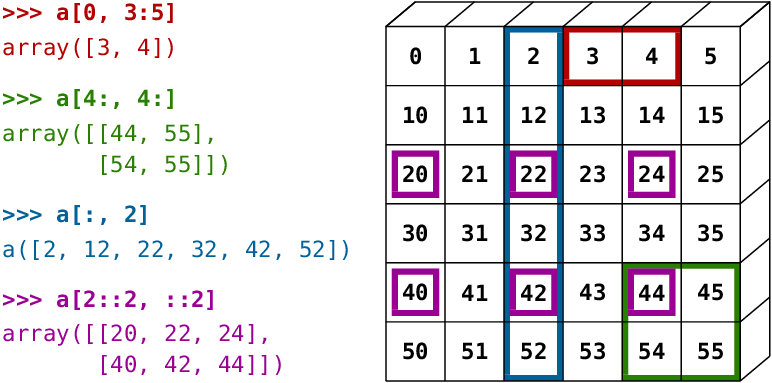

# Plotten voor dummies
<br>
<div >
    <img style="display: block; margin-left: auto; margin-right: auto; width: 70%;" src="https://files.realpython.com/media/Python_Plotting_With_Matplotlib_Watermark.610acdacc476.jpg">
</div>

# Plotten voor dummies: eenvoudige plot

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

Om te plotten gebruiken we nog een andere library: Matplotlib. Functies in open source libraries zoals NumPy, Matplotlib, etc. hebben een uitgebreide documentatie. Zoals hierboven vermeld is deze documentatie raadplegen een eerste reflex als je een nieuwe functie wilt gebruiken. Bovendien zijn er veel fora (bijvoorbeeld stackexchange) waar je enorm veel informatie vindt over hoe je deze libraries gebruikt.

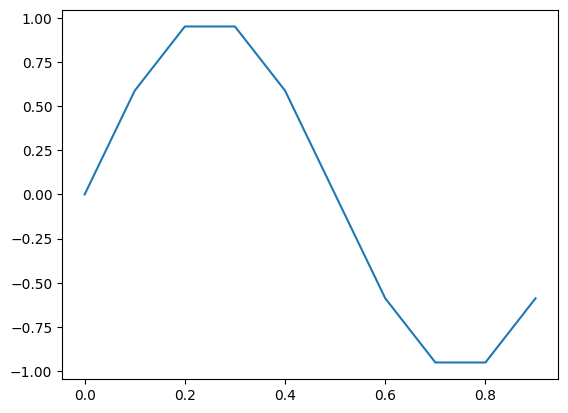

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


array([0. , 0.1, 0.2])

In [4]:
import matplotlib.pyplot as plt

t = np.arange(start=0.0, stop=1, step=0.1)

plt.plot(t, np.sin(2 * np.pi * t))
plt.show()
t = np.array(t)
print(t)
t[:3]

# Opmaak in orde brengen

Onderstaande code geeft dezelfde functie weer als hierboven, maar op een meer presenteerbare manier.

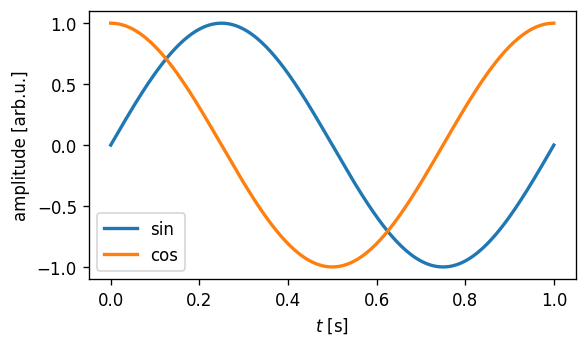

Figure(600x360) 
 Axes(0.157639,0.205179;0.812361x0.744821) 



In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(5, 3))

# t = np.linspace(start=0.0, stop=1.0, num=3)
t = np.linspace(0, 1, 300)

# Plot
ax.plot(t, np.sin(2 * np.pi * t), label='sin', linewidth=2)
ax.plot(t, np.cos(2 * np.pi * t), label='cos', linewidth=2)

# Assen opmaken
ax.set_ylabel("amplitude [arb.u.]")
ax.set_xlabel("$t$ [s]")  # Je kunt LaTeX gebruiken om assen te benoemen!

# Legenda toevoegen
ax.legend()

# Wat matplotlib magie...
plt.tight_layout()

# Opslaan?
# fig.savefig('sinusoïde.png')
plt.show()
print(fig, "\n",ax, "\n") 

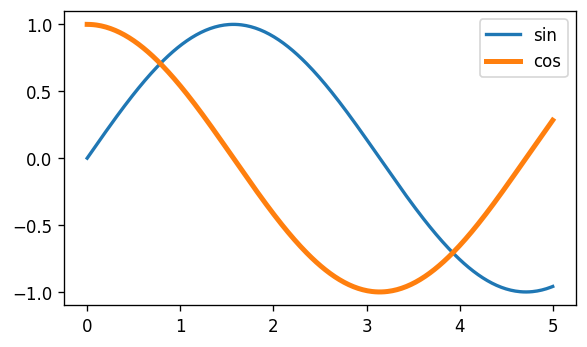

In [6]:
t = np.linspace(0, 5, 300)
fig, ax = plt.subplots(dpi=120, figsize=(5,3) )

ax.plot(t, np.sin(t), label= "sin", linewidth = 2)
ax.plot(t, np.cos(t), label="cos", linewidth=3)
ax.legend(); plt.tight_layout()
plt.show()

# Interpolatie
Het schatten van een onbekende waarde tussen bekende waarden

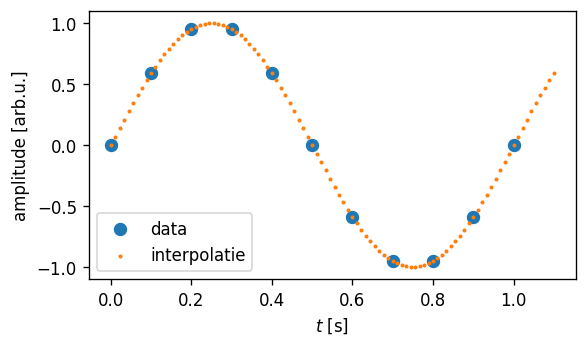

In [10]:
from scipy import interpolate

t = np.arange(start=0.0, stop=1.1, step=0.1)
y = np.sin(2*np.pi*t)



fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(5, 3))

# Plot
ax.scatter(t, y, label='data', linewidth=2)

# Assen opmaken
ax.set_ylabel("amplitude [arb.u.]")
ax.set_xlabel("$t$ [s]")

## ----- Interpolatie -----
tnew = t + 0.05
tnew = np.linspace(0, 1.1, 100)
ynew = np.sin(2*np.pi*tnew)
ax.scatter(tnew, ynew, s=2, label='interpolatie')

ax.legend()
plt.tight_layout() ; plt.show()

# Fitten model aan data

We gaan een experiment analyseren om de wet van Ohm na te gaan. Namelijk, de gemeten gesloten klemspanning $V_K$ [V] bij een stroom $I$ [A], over een bron $V_1$ met open klemspanning $V_0$. Volgens de theorie kan men de interne weerstand $R_i$ [$\Omega$] van de bron bepalen als:

$$R_i = \frac{V_o - V_k}{I}. $$

Als voorbeeld gaan we dit nu doen d.m.v. een lineaire fit  door $V_k(I)$:

$$V_k = -R_i \cdot I + V_o. $$

Eerst en vooral kijken we eerst naar hoe de data eruitziet:

In [14]:
# De data is in csv formaat gegeven. De extensie `.dat` kun je ook openen met je favoriete text editor.
# Opmerking: numpy ziet lijnen met een `#` symbool als comments en zal deze overslaan! (handig)
# Maak gebruik van de header beschrijving in `ohm.dat` om te weten wat elke kolom voorstelt
data = np.loadtxt("data/ohm.dat", delimiter=",")

I = data[:, 0]  # A
V = data[:, 1]  # V
dV = data[:, 2] # V

print(I)

[0.00413 0.00421 0.00665 0.00974 0.01284 0.01404 0.0186 ]


In [15]:
def model(x, a, b):
    """Lineair model"""
    return a * x + b

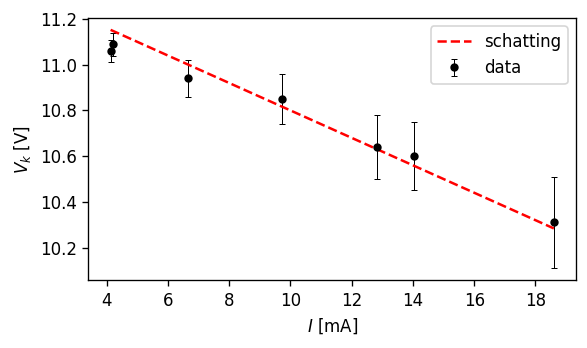

In [16]:
_, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(5, 3))

# Plot
ax.errorbar(I*1e3, V, yerr=dV, label="data",
        # De errorbars wat mooier maken :)
        marker="o", markersize=4, fmt=" ", color="black", ecolor="black", capsize=2, capthick=0.6, linewidth=0.6)

# Assen
ax.set_ylabel("$V_{k}$ [V]")
ax.set_xlabel("$I$ [mA]")

# ----- Schatting -----
x = np.linspace(np.min(I), np.max(I), 100)*1e3
ax.plot(x, model(x, -0.06, 11.4), 'r--', label="schatting")

ax.legend()
plt.tight_layout() ; plt.show()

In [17]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(model, I*1e3, V, sigma=dV)

fout = np.sqrt(np.diag(pcov))
labels = ("rico", "offset")
units = ("Ohm", "V")

# label,parameter, standaarddeviatie, unit
# zip: arrays samenvoegen
for l, p, s, u in zip(labels, popt, fout, units):
    print(f"{l}: {p:.3f} ± {s:.3f} {u}")

rico: -0.049 ± 0.003 Ohm
offset: 11.282 ± 0.020 V


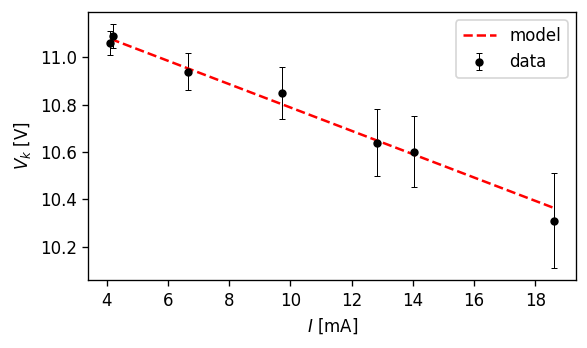

In [18]:
_, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(5, 3))

# Plot
ax.errorbar(I*1e3, V, yerr=dV, label="data",
        # De errorbars wat mooier maken :)
        marker="o", markersize=4, fmt=" ", color="black", ecolor="black", capsize=2, capthick=0.6, linewidth=0.6)

# Assen
ax.set_ylabel("$V_{k}$ [V]")
ax.set_xlabel("$I$ [mA]")

# ----- Plot Fit -----
x = np.linspace(np.min(I), np.max(I), 100)*1e3
ax.plot(x, model(x, popt[0], popt[1]), 'r--', label="model")

ax.legend()
plt.tight_layout() ; plt.show()

## Opdracht

### Radioactief verval

We hebben een onbekend isotoop gekregen van fluor (F). We proberen nu via zijn halfwaardetijd ($t_{1/2}$) te achterhalen welk isotoop we hebben gekregen. Online (https://nl.wikipedia.org/wiki/Isotopen_van_fluor) vinden we terug wat de halfwaardetijd van elk isotoop van fluor is. Hieruit kunnen we bepalen welk isotoop we hebben gekregen.

De data in 'fluor.dat' bevat een meting van de activiteit van het onbekend isotoop in functie van tijd (s). Activiteit (a.u.) van de stof is gemeten door het aantal radioactieve vervallen te meten in de tijd.

Je gaat deze data fitten aan de hand van het model voor radioactief verval $A(t) = A_0exp(-t/\tau)$ met $A(t)$ de activiteit op tijdstip $t$ en $A_0$ de activiteit bij het begin van de metingen. Via de relatie $t_{1/2} = \tau \ln(2)$ bepaal je de halfwaardetijd $t_{1/2}$ en zijn fout. Bepaal ook de activiteit op tijdstip 0 door $A_0$ en de fout hierop door de data te fitten.

To-do:

__1.__ Laad de data in het geheugen en plot deze met zijn error.

__2.__ Fit de data volgens het model $A(t) = A_0exp(-t/\tau)$. Definieer een nieuwe functie voor deze opdracht.

__3.__ Plot de data en de fit op 1 figuur. Zet in tekst de gevonden fitparameters met hun fout ook op de plot. Hiervoor kan je kijken in de documentatie: https://matplotlib.org/stable/tutorials/text/text_intro.html. Aan de hand van de gevonden $t_{1/2}$ kan je achterhalen welk isotoop het is.

__4.__ Hoe actief is mijn isotoop nog na 1 min? Met andere woorden: wat is de activiteit na 1 min. Gebruik hiervoor het model met de gevonden fitparameters.